## Imports

In [1]:
print 'importing modules  '
import os

import subprocess

import datetime
from datetime import datetime as time

import pandas as pd
print pd.__version__


import matplotlib
import matplotlib.pyplot as plt
print matplotlib.__version__

from collections import Counter

import numpy as np
print np.__version__

import seaborn as sns
print sns.__version__

import scipy
import scipy.stats as stats
print scipy.__version__



%matplotlib inline
# magic command for matplotlib figures in the jupyter notebook

importing modules  
0.23.4
2.2.3
1.15.4
0.9.0
1.1.0


In [2]:
from tqdm import tqdm_notebook
from tqdm import tqdm
# this package provides an integrated progress bar for the notebook

## Get chip data

In [3]:
chip_table = pd.read_csv('./chip_table_with_muts.tsv', sep = '\t', index_col = 'guide_name')
chip_table.head(10)
print len(chip_table)

39978


## import data from YAAM

In [4]:
YAAM_data_file = './YAAM_15_07_2018.txt'
# data file downloaded from the Yeast Amino Acid Modification database (YAAM) 15-07-2018
# http://yaam.ifc.unam.mx/index.php


PTM_df = pd.DataFrame(columns = ['ORF', 'residue', 'position','modification'])

print PTM_df.head()

spe_format =['Glycosylation', 'Ca', 'Disulfide','Lipidation','ActiveSite','Sumoylation']
#scheme is line[1]=name,[3]=residue,[4]=pos: phos, meth, acet, ubiq, succ, oxi, nitr, ntAce, metal
#scheme is line[1]=name,[2]=residue,[3]=pos: glycos, Ca, Disulfide, lipidation, activeSite, sumoyl

i_count = 0

with open(YAAM_data_file, 'r') as source:
    
    next(source)
    next(source)
    # skips the header
    
    for line in tqdm(source):
        # loops through the lines in the file
        
        if line[0].isdigit() == False and line.startswith('id') == False:
            # detects lines that mark the beginning of a next PTM section in the database
            
            PTM_type = line.strip('\n').strip('\r')
            print repr(PTM_type)
            # extract PTM section name and quality control for future use
                     
            next(source)
            # skips the header of the section in the database
            
        elif line[0].isdigit() == True:
            line_info = line.split('\t')
            # detects PTM entries, prepare for info extraction
            
            
            
            if PTM_type not in spe_format:
                # check for format of the section of the db
            
                
                entry = {'ORF': line_info[1],
                         'residue': line_info[3], 
                         'position': line_info[4],
                         'modification': PTM_type} 
                
                entry_indexed = {i_count: entry}
                
                to_df = pd.DataFrame.from_dict(entry_indexed, orient ='index')
                
                add_entry = pd.concat([PTM_df, to_df], ignore_index=True, sort=True)
                # sort = True required on my laptop
                PTM_df = add_entry
                
                i_count += 1
                
                
                
                
            else:
                PTM_site = line_info[1] + '|' + line_info[2] + '|' + str(line_info[3])
                #print PTM_site
                # deprecated quality control
                
                entry = {'ORF': line_info[1],
                         'residue': line_info[2], 
                         'position': line_info[3],
                         'modification': PTM_type}
                
                entry_indexed = {i_count: entry}
                
                to_df = pd.DataFrame.from_dict(entry_indexed, orient ='index')
                add_entry = pd.concat([PTM_df, to_df], ignore_index=True, sort =True)
                
                PTM_df = add_entry
                
                i_count += 1
                
                

            


75it [00:00, 743.28it/s]

Empty DataFrame
Columns: [ORF, residue, position, modification]
Index: []
'Phosphorylation'


87777it [04:10, 218.05it/s]

'Methylation'


88053it [04:12, 231.73it/s]

'Acetylation'


98098it [05:01, 181.09it/s]

'Ubiquitination'


112985it [06:30, 163.66it/s]

'Succinylation'


114729it [06:41, 140.77it/s]

'Oxidation'


115604it [06:47, 151.36it/s]

'Nitration'
'NtAcetylation'


116387it [06:52, 167.36it/s]

'Glycosylation'


118357it [07:04, 163.89it/s]

'Ca'
'Disulfide'


118640it [07:06, 160.35it/s]

'Lipidation'


118827it [07:07, 160.83it/s]

'ActiveSite'


119936it [07:14, 162.91it/s]

'Sumoylation'


120072it [07:15, 160.36it/s]

'Metal'


121992it [07:28, 272.08it/s]


In [5]:
pYtest = (PTM_df['ORF'] == 'YHR016C')&(PTM_df['residue'] == 'Y')

print PTM_df[pYtest]

pY = (PTM_df['residue'] == 'Y')&(PTM_df['modification'] == 'Phosphorylation')


print list(PTM_df[pY]['ORF'].unique())

           ORF     modification position residue
6085   YHR016C  Phosphorylation      373       Y
26427  YHR016C  Phosphorylation      306       Y
26429  YHR016C  Phosphorylation      373       Y
42437  YHR016C  Phosphorylation      306       Y
42438  YHR016C  Phosphorylation      373       Y
61349  YHR016C  Phosphorylation      308       Y
61351  YHR016C  Phosphorylation      373       Y
['YLR113W', 'YBL016W', 'YHR030C', 'YJL106W', 'YGR040W', 'YML074C', 'YBR160W', 'YMR139W', 'YJL141C', 'YJR094C', 'YPL061W', 'YNL225C', 'YGR200C', 'YBL002W', 'YDR028C', 'YJR009C', 'YGR192C', 'YNR016C', 'YOR175C', 'YOL130W', 'YJL020C', 'YNL166C', 'YDL117W', 'YPL049C', 'YKL060C', 'YCL027W', 'YMR232W', 'YGL195W', 'YBR086C', 'YNL308C', 'YLR260W', 'YGL009C', 'YDR060W', 'YNL307C', 'YNL074C', 'YKL129C', 'YMR109W', 'YLR138W', 'YDL089W', 'YCR077C', 'YER178W', 'YOL061W', 'YOL054W', 'YKR093W', 'YDL007W', 'YPL085W', 'YHR098C', 'YDR312W', 'YDR310C', 'YOL006C', 'YDR050C', 'YDR074W', 'YAR009C', 'YBL100W-A', 'YBR235W', 

Rest of annotation on chip table requires mutation prediction part of script
    
    

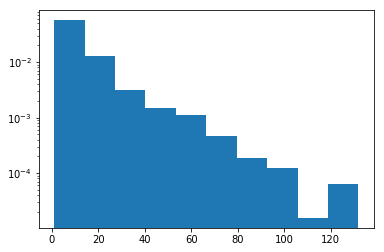

In [6]:
plt.hist([len(PTM_df[PTM_df['ORF'] == x]['position'].unique()) for x in PTM_df['ORF'].unique()], density = True)
plt.yscale('log')

4896 orfs with annotations in YAAM. 1081 genes in chip table have at least one annotation in YAAM. I need to modify the format of the table so its easier to work with.

## modify and reannotate the chip table for better mutation predictions and formating.

In [7]:
from itertools import permutations
# useful to test multiple possibilities

def reverse_complement(dna):
    """ function that reverse complements DNA
    dna: input dna sequence
    """
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return ''.join([complement[base] for base in dna[::-1]])
    
codontable = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }

def translate(codon):
    """ function that a DNA codon to anino acid
    codon: the input codon
    """
    return codontable[codon]

def prot_translation(cds):
    """ a function that translates a CDS
    cds: the coding DNA sequence
    """
   
    seq_len = len(cds)
    prot_seq = ''
    
    for x in range(0, ((seq_len/3))):
        codon = cds[(x*3):((x*3)+3)]      
        aa_res = translate(codon)
        prot_seq += aa_res
        # loop through cds and translate each codon
        
    return prot_seq                    

In [8]:
BY4741_orfs = './BY4741_all_CDS.fasta'
# import a file containing BY4741 cds sequences, retrieved from SGD

orf_dict ={}
# a dictionnary for orf sequences

with open(BY4741_orfs, 'r') as orf_fasta:
    
    for line in orf_fasta:
        
        if line.startswith('>') == True:
            
            orf_info = line.split(' ')
            orf_name = orf_info[0].strip('_BY4741').strip('>')

            
            orf_dict[orf_name] = ''
            
        else:
        
            orf_dict[orf_name] += line.strip('\n')
# loops through the fasta file and store sequence info
            
print len(orf_dict.keys())
            
for seq_name, seq in orf_dict.items():
    
    if 'N' in seq:
        
        del orf_dict[seq_name]
# remove all sequences with Ns
        
print len(orf_dict.keys())
print orf_dict['YGR292W']
# test function

5327
5281
ATGACTATTTCTGATCATCCAGAAACAGAACCAAAGTGGTGGAAAGAGGCCACAATCTATCAAATTTACCCAGCAAGTTTTAAAGACTCCAATAACGATGGCTGGGGTGATTTAAAAGGTATCACTTCCAAGTTGCAGTATATTAAAGATCTTGGCGTTGATGCTATTTGGGTTTGTCCGTTTTATGACTCTCCTCAACAAGATATGGGGTATGATATATCCAACTACGAAAAGGTCTGGCCCACATATGGTACCAATGAGGACTGTTTTGAGCTAATTGACAAGACTCATAAGCTGGGTATGAAATTCATCACCGATTTGGTTATCAACCACTGTTCTACAGAACACGAATGGTTCAAAGAGAGCAGATCCTCGAAGACCAATCCGAAGCGTGACTGGTTCTTCTGGAGACCTCCTAAAGGTTATGACGCCGAAGGCAAGCCAATTCCTCCAAACAATTGGAAATCTTTCTTTGGTGGTTCAGCTTGGACTTTTGATGAAACTACAAATGAATTTTACCTCCGTTTGTTTGCGAGTCGTCAAGTTGACTTGAATTGGGAGAATGAAGACTGCAGAAGGGCAATCTTTGAAAGTGCTGTTGGATTTTGGCTGGACCATGGTGTAGATGGTTTTAGAATCGATACCGCTGGTTTGTATTCGAAACGTCCTGGTTTACCAGATTCCCCAATTTTTGACAAAACCTCGAAATTACAACATCCAAATTGGGGGTCTCACAATGGTCCTAGGATTCATGAATATCATCAAGAACTACACAGATTTATGAAAAACAGGGTGAAAGATGGTAGAGAAATAATGACAGTCGGTGAAGTTGCCCATGGAAGTGATAATGCTTTATACACCAGTGCAGCTAGATACGAAGTCAGCGAAGTTTTCTCCTTCACGCACGTTGAAGTTGGTACCTCGCCATTTTTCCGTTATAACATAGTGCCCTTCACCTTGAAACAATGGAAAGAAGCCATTGCATCGAAC

In [9]:
#mutations are C>G and C>T (+ strand) and G>A and G>C (- strand)

mutation_priority = [2,3,1,4,0,5,6]
# encode target-AID activity as a ranking (position 18>17>19>16>20>15>14)
# modified 21-10-2019 to include position 20 which was left out in the previous model

def mutate_guide(guide):
    """ predict possible mutations created by a gRNA
    guide: gRNA id in table
    """
   
    mutant_list = []
    # list of mutants
    
    guide_line = chip_table.loc[guide]
    
    for pos_in_guide in mutation_priority:
        guide_seq = [x for x in guide_line['sequence']]
        
        # loops through nucleotides in guide sequence following Target-AID activity ranking
              
        if len(mutant_list) < 4:
            # only look at the 2 most probable mutated positions
        
            if guide_seq[pos_in_guide] == 'C':

                guide_seq[pos_in_guide] = 'G'

                mutant_list.append(''.join(guide_seq))

                guide_seq[pos_in_guide] = 'T'

                mutant_list.append(''.join(guide_seq))
                
                # create C to G and C to T mutants of the guide sequence
    
    return mutant_list
    # return a list of mutant guide sequences

print chip_table.index[1]

mutate_guide('chrI_55603r')
# test function

chrI_55603r


['GGAGAGCTACATCAATGACT',
 'GGATAGCTACATCAATGACT',
 'GGACAGGTACATCAATGACT',
 'GGACAGTTACATCAATGACT']

In [10]:
mutation_in_guides_dict = {}

for guide in chip_table.index:
    
    mutation_in_guides_dict[guide] = mutate_guide(guide)
# loop through all gRNAs and get mutant guide seuqence, stored in a dict

(array([14336.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25642.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

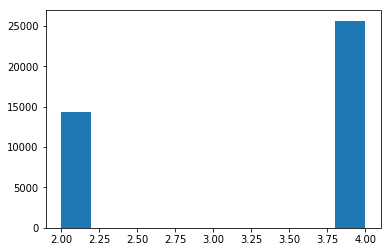

In [11]:
plt.hist([len(x) for x in mutation_in_guides_dict.values()])
# more guides with multiple possible sites

In [12]:
def mutation_in_prot(guide):
    """ Function that will predict possible mutations in the protein sequence of an ORF that will be induced by
    Target-AID mutagenesis
    """
    
    mutations_in_prot_dict = {0: np.NaN,
                              1: np.NaN,
                              2: np.NaN,
                              3: np.NaN}
    # empty containers
    
    orf = chip_table.loc[guide]['target']
    strand = chip_table.loc[guide]['strand']
    guide_seq = chip_table.loc[guide]['sequence']
    # get guide params
    
    if strand == '-':
        guide_seq = reverse_complement(guide_seq)
        # check strand, rc if necessary
    
    if orf in orf_dict.keys():
        
        mutated_guides = mutation_in_guides_dict[guide]
        
        cds = orf_dict[orf]
        
        
        mut_index = 0
        
        for guide_mut in mutated_guides:
            
            if strand == '-':
                
                guide_mut = reverse_complement(guide_mut)
                
            mut_orf = cds.replace(guide_seq, guide_mut)
            
            wt_prot = prot_translation(cds)
            
            mut_prot = prot_translation(mut_orf)
            
            mut_aa_pos = [i for i in xrange(len(wt_prot)) if wt_prot[i] != mut_prot[i]]


            if mut_aa_pos == []:
                
                if guide_seq not in cds:
                    
                    out = 'error'
                    # if the guide sequence cannot be found in the cds, return an error
                    
                else:
                
                    guide_pos = cds.index(guide_seq)

                    #print guide_pos

                    mut_nt_pos = 0

                    for nt in range(0,20):

                        if guide_seq[nt] != guide_mut[nt]:

                            mut_nt_pos = nt


                    mut_dna_pos = guide_pos + mut_nt_pos

                    codon_in_prot = mut_dna_pos/3


                    mut_orf = cds.replace(guide_seq, guide_mut)

                    orignal_codon = cds[(codon_in_prot*3):((codon_in_prot*3)+3)]


                    mut_codon = mut_orf[(codon_in_prot*3):((codon_in_prot*3)+3)]


                    out = 'silent' + '|'+ orignal_codon + '>' + mut_codon +'|' + wt_prot[codon_in_prot] + '|' + str(codon_in_prot+1)
                    # output for silent mutations
                
            else:
                wt_res = wt_prot[mut_aa_pos[0]]
                mut_res = mut_prot[mut_aa_pos[0]]
                
                out = wt_res + '|' + str(mut_aa_pos[0]+1) + '|' + mut_res
                # output for non-synonymous or non-sense mutations
                
            mutations_in_prot_dict[mut_index] = out
            
            mut_index += 1
            
            
            #####
            
    else:
        
        mutations_in_prot_dict = {0: 'invalid seq',
                                  1: 'invalid seq',
                                  2: 'invalid seq',
                                  3: 'invalid seq'}
        # if sequence not present in orf dicts or contains errors, return error in annotation
        
    return mutations_in_prot_dict

mutation_in_prot('chrI_55603r')
# output example

{0: 'D|412|E',
 1: 'silent|GAC>GAT|D|412',
 2: 'S|413|R',
 3: 'silent|AGC>AGT|S|413'}

In [13]:
chip_table['mut1_C>G'] = np.nan
chip_table['mut1_C>G'] = chip_table['mut1_C>G'].astype('str')


chip_table['mut1_C>T'] = np.nan
chip_table['mut1_C>T'] = chip_table['mut1_C>T'].astype('str')

chip_table['mut2_C>G'] = np.nan
chip_table['mut2_C>G'] = chip_table['mut2_C>G'].astype('str')


chip_table['mut2_C>T'] = np.nan
chip_table['mut2_C>T'] = chip_table['mut2_C>T'].astype('str')




for guide in chip_table.index:
    
    mutate = mutation_in_prot(guide)
    
    chip_table.at[guide, ('mut1_C>G')] = mutate[0]
    chip_table.at[guide, ('mut1_C>T')] = mutate[1]
    chip_table.at[guide, ('mut2_C>G')] = mutate[2]
    chip_table.at[guide, ('mut2_C>T')] = mutate[3]
    
# make columns and update table with the predicted mutations

In [14]:
del chip_table['mutations']
# remove the old annotation format from the chip design script
chip_table.head(10)

,number,orf_type,target,position,strand,sequence,mut1_C>G,mut1_C>T,mut2_C>G,mut2_C>T
guide_name,,,,,,,,,,
chrI_55522r,0,high_effect,YAL047C,1313,+,TCAGTTAGACAAATTAGACT,Q|439|E,Q|439|*,NaN,NaN
chrI_55603r,1,high_effect,YAL047C,1232,+,GGACAGCTACATCAATGACT,D|412|E,silent|GAC>GAT|D|412,S|413|R,silent|AGC>AGT|S|413
chrI_55655,2,high_effect,YAL047C,1183,-,GGTCTGAGTTTCCAGTTCTT,Q|400|H,silent|CAG>CAA|Q|400,NaN,NaN
chrI_55964,3,high_effect,YAL047C,874,-,AATCTCTAATTGAGTGTCTA,E|297|D,silent|GAG>GAA|E|297,E|297|Q,E|297|K
chrI_55988,4,high_effect,YAL047C,850,-,TTTCTCAAAACGAGACTCGA,E|289|D,silent|GAG>GAA|E|289,E|289|Q,E|289|K
chrI_56003,5,high_effect,YAL047C,835,-,CTCGACGGCTGAAATTGGTA,E|285|Q,E|285|K,E|285|D,silent|GAG>GAA|E|285
chrI_56041,6,high_effect,YAL047C,797,-,TTACATTTTCTGTATCAATG,V|272|L,V|272|I,NaN,NaN
chrI_56071,7,high_effect,YAL047C,767,-,TGTCATGAATTTCGTCATTC,D|262|H,D|262|N,NaN,NaN
chrI_56113r,8,high_effect,YAL047C,722,+,GGACTCACCATCAAGTAAAG,D|242|E,silent|GAC>GAT|D|242,S|243|*,S|243|L


## Annotate with protein information from SGD

In [15]:
# Prep the data

protein_prop_table = pd.read_csv('./external_databases/SGD_export2.tsv', sep = '\t', index_col=0, header=None, 
                                 names = ['stan_name','name', 'half_life_val', 'half_life_unit', 'hydropath', 
                                          'codon_adapt_index', 'codon_bias', 'instability_index', 
                                          'freq_opt_codon', 'length', 'aliphatic_index','aromaticity', 
                                          'mol_weigth'])
# get data from SGD, put in the table. Not all info is used in the data analysis


protein_prop_table.head(10)

orf_half_life_mins_dict = {}

print protein_prop_table['half_life_unit'].unique()

for orf in protein_prop_table.index:
    
    if protein_prop_table.loc[orf]['half_life_unit'] == 'hr':
        
        orf_half_life_mins_dict[orf] = protein_prop_table.loc[orf]['half_life_val']*60
        
    elif protein_prop_table.loc[orf]['half_life_unit'] == 'min':
        
        orf_half_life_mins_dict[orf] = protein_prop_table.loc[orf]['half_life_val']
        
    else:
        orf_half_life_mins_dict[orf] = np.NaN
        
# convert half life to min if in hourse

print orf_half_life_mins_dict.items()[0:10]


protein_prop_table['half_life_min'] = np.nan
protein_prop_table['half_life_min'] = protein_prop_table['half_life_min'].astype('object')

prot_in_index = protein_prop_table.index

for orf in protein_prop_table.index:

    protein_prop_table.at[orf, ('half_life_min')] = orf_half_life_mins_dict[orf]
    
# add info to table 
    
protein_prop_table.head(10)


['hr' 'min']
[('YBR177C', 462.0), ('YIL140W', 102.0), ('YLR268W', 600.0), ('YPL043W', 360.0), ('YJL155C', 606.0), ('YIR004W', 510.0), ('YMR111C', 432.0), ('YBR255W', 726.0), ('YJL122W', 330.0), ('YIL034C', 612.0)]


,stan_name,name,half_life_val,half_life_unit,hydropath,codon_adapt_index,codon_bias,instability_index,freq_opt_codon,length,aliphatic_index,aromaticity,mol_weigth,half_life_min
Q0045,COX1,Cytochrome c OXidase,10000.0,hr,0.74,0.14,0.63,27.72,0.74,534,111.72,0.15,58795.3,600000
Q0140,VAR1,NaN,10.8,hr,-0.79,0.09,-0.17,41.68,0.30,398,81.18,0.09,47155.2,648
Q0250,COX2,Cytochrome c OXidase,10.1,hr,0.35,0.19,0.44,36.99,0.61,251,107.88,0.12,28550.2,606
R0020C,REP1,REPlication,6.4,hr,-0.46,0.10,-0.07,39.72,0.41,373,76.05,0.11,43224.5,384
R0040C,REP2,REPlication,3.3,hr,-0.52,0.11,0.04,55.44,0.45,296,82.06,0.04,33201.5,198
YAL001C,TFC3,Transcription Factor class C,6.9,hr,-0.51,0.12,-0.03,31.78,0.42,1160,83.17,0.08,132146.8,414
YAL003W,EFB1,Elongation Factor Beta,9.7,hr,-0.42,0.76,0.78,41.79,0.88,206,72.18,0.08,22603.0,582
YAL005C,SSA1,Stress-Seventy subfamily A,20.2,hr,-0.44,0.71,0.80,31.90,0.89,642,78.82,0.06,69636.8,1212
YAL007C,ERP2,Emp24p/Erv25p Related Protein,10.5,hr,0.15,0.23,0.25,33.28,0.59,215,104.56,0.10,24058.8,630
YAL009W,SPO7,SPOrulation,14.4,hr,-0.32,0.11,0.02,51.52,0.45,259,79.54,0.12,30130.0,864


In [16]:
var_list = ['stan_name','name', 'half_life_val', 'half_life_unit', 'half_life_min' ,'hydropath', 'codon_adapt_index',
            'codon_bias', 'instability_index', 'freq_opt_codon', 'length', 'aliphatic_index', 'aromaticity', 'mol_weigth']

for variable in tqdm(var_list):
    chip_table[variable] = np.nan
    chip_table[variable] = chip_table[variable].astype('object')
    
    for gene in chip_table.index:
        target = chip_table.loc[gene]['target']

        if target in prot_in_index:  
            chip_table.at[gene, (variable)] = protein_prop_table.loc[target][variable]


# annotate table with new information

100%|██████████| 14/14 [02:27<00:00, 10.53s/it]


In [17]:
chip_table.head(10)

,number,orf_type,target,position,strand,sequence,mut1_C>G,mut1_C>T,mut2_C>G,mut2_C>T,...,half_life_min,hydropath,codon_adapt_index,codon_bias,instability_index,freq_opt_codon,length,aliphatic_index,aromaticity,mol_weigth
guide_name,,,,,,,,,,,,,,,,,,,,,
chrI_55522r,0,high_effect,YAL047C,1313,+,TCAGTTAGACAAATTAGACT,Q|439|E,Q|439|*,NaN,NaN,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_55603r,1,high_effect,YAL047C,1232,+,GGACAGCTACATCAATGACT,D|412|E,silent|GAC>GAT|D|412,S|413|R,silent|AGC>AGT|S|413,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_55655,2,high_effect,YAL047C,1183,-,GGTCTGAGTTTCCAGTTCTT,Q|400|H,silent|CAG>CAA|Q|400,NaN,NaN,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_55964,3,high_effect,YAL047C,874,-,AATCTCTAATTGAGTGTCTA,E|297|D,silent|GAG>GAA|E|297,E|297|Q,E|297|K,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_55988,4,high_effect,YAL047C,850,-,TTTCTCAAAACGAGACTCGA,E|289|D,silent|GAG>GAA|E|289,E|289|Q,E|289|K,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_56003,5,high_effect,YAL047C,835,-,CTCGACGGCTGAAATTGGTA,E|285|Q,E|285|K,E|285|D,silent|GAG>GAA|E|285,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_56041,6,high_effect,YAL047C,797,-,TTACATTTTCTGTATCAATG,V|272|L,V|272|I,NaN,NaN,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_56071,7,high_effect,YAL047C,767,-,TGTCATGAATTTCGTCATTC,D|262|H,D|262|N,NaN,NaN,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2
chrI_56113r,8,high_effect,YAL047C,722,+,GGACTCACCATCAAGTAAAG,D|242|E,silent|GAC>GAT|D|242,S|243|*,S|243|L,...,318,-0.79,0.14,0.05,54.73,0.46,622,88.07,0.05,72073.2


## Annotate with PTM sites, proximity, diversity and rate/aa

In [18]:
var_list = ['diversity_PTM','PTM_number','PTM_rate','mut_1_effect_bin','mut_1_effect', 'mut_1_proximity',
            'mut_2_effect_bin', 'mut_2_effect', 'mut_2_proximity']
# the new columns to add to the dataframe


for variable in var_list:
    chip_table[variable] = np.nan
    chip_table[variable] = chip_table[variable].astype('object')
# create new, empty columns
    
print chip_table.loc['chrI_55522r']['target']

for guide in tqdm(chip_table.index):
    # loop through guides

    orf = chip_table.loc[guide]['target']
    select_orf_annots = (PTM_df['ORF'] == orf)
    orf_annot = PTM_df[select_orf_annots]
    # get YAAM PTM annotations for the gRNA target orf
    
    
    if len(orf_annot) > 0:
        # if there is one or more annotation:
        
        diversity_PTM = orf_annot['modification'].unique()
        # store info on the different types of PTMs
        
        PTM_number = len(orf_annot['position'].unique())
        # store info on the number of PTMs
        
        PTM_rate = (PTM_number*1.0)/chip_table.loc[guide]['length']
        # store info on the PTM/residue rate
        
        PTM_positions = [int(x) for x in orf_annot['position'].unique()]
        # get the positions at which PTMs have been annotated
        
        
        
        mut_1_effect_bin = 0
        # set base value: do the most probable mutations directly affect a PTM annotated site  1=yes, 0=no
        
        mut_1_effect = np.NaN
        # set base value: what PTM annotated site is affected
        
        mut_1_proximity = 0
        # set base value: is the mutation within 5 aa of an annotated PTM
        
        mut_2_effect_bin = 0
        # set base value: do the second most probable mutations directly affect a PTM annotated site 1=yes, 0=no
        
        mut_2_effect = np.NaN
        # set base value: what PTM annotated site is affected
        
        mut_2_proximity = 0
        # set base value: is the mutation within 5 aa of an annotated PTM       
        
        if 'silent' not in chip_table.loc[guide]['mut1_C>G'] and '|' in chip_table.loc[guide]['mut1_C>G']:
            # filters out silent mutations and gRNAs for which no mutation prediction is available, C to G 1
            
            mut_1_CG_pos = int(chip_table.loc[guide]['mut1_C>G'].split('|')[1])
            
            
            if mut_1_CG_pos in PTM_positions:
                
                mut_1_effect_bin = 1
                
                mut_1_effect = orf_annot[orf_annot['position'] == mut_1_CG_pos]['modification']
                
                
            elif [x for x in PTM_positions if x in range((int(mut_1_CG_pos)-5), (int(mut_1_CG_pos+5)))] != []:
                
                mut_1_proximity = 1
                
        elif 'silent' not in chip_table.loc[guide]['mut1_C>T'] and '|' in chip_table.loc[guide]['mut1_C>T']:
            # filters out silent mutations and gRNAs for which no mutation prediction is available, C to T 1
            
            mut_1_CT_pos = chip_table.loc[guide]['mut1_C>T'].split('|')[1]
            
            if mut_1_CT_pos in PTM_positions:
                
                mut_1_effect_bin = 1
                
                #print orf, mut_1_CG_pos
                
                mut_1_effect = orf_annot[orf_annot['position'] == mut_1_CT_pos]['modification']
                
            elif [x for x in PTM_positions if x in range(int((mut_1_CT_pos-5)), int((mut_1_CT_pos+5)))] != []:
                
                mut_1_proximity = 1
                
        elif chip_table.loc[guide]['mut2_C>G'] not in [np.NaN]:
            if 'silent' not in chip_table.loc[guide]['mut2_C>G'] and '|' in chip_table.loc[guide]['mut2_C>G']:
                # filters out silent mutations and gRNAs for which no mutation prediction is available, C to G 2

                mut_2_CG_pos = int(chip_table.loc[guide]['mut2_C>G'].split('|')[1])

                if mut_2_CG_pos in PTM_positions:

                    mut_2_effect_bin = 1

                    mut_2_effect = orf_annot[orf_annot['position'] == mut_2_CG_pos]['modification']

                elif [x for x in PTM_positions if x in range(int((mut_2_CG_pos-5)), int((mut_1_CG_pos+5)))] != []:

                    mut_2_proximity = 1
                
        elif chip_table.loc[guide]['mut2_C>T'] not in [np.NaN] and '|' in chip_table.loc[guide]['mut2_C>T']: 
            if 'silent' not in chip_table.loc[gene]['mut2_C>T']:
                # filters out silent mutations and gRNAs for which no mutation prediction is available, C to G 1

                mut_2_CT_pos = chip_table.loc[gene]['mut2_C>T'].split('|')[1]

                if mut_2_CT_pos in PTM_positions:

                    mut_2_effect_bin = 1

                    mut_2_effect = orf_annot[orf_annot['position'] == mut_2_CT_pos]['modification']

                elif [x for x in PTM_positions if x in range(int((mut_2_CT_pos-5)), int((mut_1_CT_pos+5)))] != []:

                    mut_2_proximity = 1
                
                
    else:
        
        diversity_PTM = np.NaN
        
        PTM_number = np.NaN
        
        PTM_rate = np.NaN
        
        PTM_positions = np.NaN
        
        mut_1_effect_bin = 0
        
        mut_1_effect = np.NaN
        
        mut_1_proximity = 0
        
        mut_2_effect_bin = 0
        
        mut_2_effect = np.NaN
        
        mut_2_proximity = 0
        
        # set all values as null if no annotations exist for the target orf
                
                
    chip_table.at[guide, ('diversity_PTM')] = diversity_PTM
    chip_table.at[guide, ('PTM_number')] = PTM_number
    chip_table.at[guide, ('PTM_rate')] = PTM_rate
    chip_table.at[guide, ('mut_1_effect_bin')] = mut_1_effect_bin
    chip_table.at[guide, ('mut_1_effect')] = mut_1_effect
    chip_table.at[guide, ('mut_1_proximity')] = mut_1_proximity
    chip_table.at[guide, ('mut_2_effect_bin')] = mut_2_effect_bin
    chip_table.at[guide, ('mut_2_effect')] = mut_2_effect
    chip_table.at[guide, ('mut_2_proximity')] = mut_2_proximity
    # annotate table

    
                
var_list = ['diversity_PTM','PTM_number','PTM_rate','mut_1_effect_bin','mut_1_effect', 
            'mut_1_proximity','mut_2_effect_bin', 'mut_2_effect', 'mut_2_proximity']                



         
               
                

  0%|          | 14/39978 [00:00<04:53, 136.23it/s]

YAL047C


100%|██████████| 39978/39978 [04:50<00:00, 137.43it/s]


In [34]:
chip_table.to_csv('./chip_table_reannot_revised.tsv', sep = '\t')
# write info to file

In [35]:
chip_table['sequence'].head(10)

guide_name
chrI_55522r    TCAGTTAGACAAATTAGACT
chrI_55603r    GGACAGCTACATCAATGACT
chrI_55655     GGTCTGAGTTTCCAGTTCTT
chrI_55964     AATCTCTAATTGAGTGTCTA
chrI_55988     TTTCTCAAAACGAGACTCGA
chrI_56003     CTCGACGGCTGAAATTGGTA
chrI_56041     TTACATTTTCTGTATCAATG
chrI_56071     TGTCATGAATTTCGTCATTC
chrI_56113r    GGACTCACCATCAAGTAAAG
chrI_56144     TAACTGTGATCCTGCTGGTG
Name: sequence, dtype: object

In [36]:
chip_table = pd.read_csv('./chip_table_reannot_revised.tsv', sep='\t', index_col = 'guide_name')

In [22]:
pattern_counter = {}


for guide_seq in list(chip_table['sequence']):
    
    guide_seq = guide_seq[0:7]
    
    guide_seq = guide_seq.replace('A', 'D').replace('T', 'D').replace('G', 'D')
    
    if guide_seq in pattern_counter.keys():
        
        pattern_counter[guide_seq] +=1
        
    else:
        
        pattern_counter[guide_seq] = 1
    
print pattern_counter
print len(pattern_counter.keys())



{'DCDCDDD': 863, 'DCDCDDC': 204, 'CCDDDCC': 57, 'CCDCCCC': 5, 'CDDCCCC': 10, 'DCDCCDC': 74, 'DCDCCDD': 312, 'DCDDCCC': 47, 'CCDCCCD': 16, 'CCCDCCC': 2, 'DDDCDDC': 1136, 'CDCDCCC': 14, 'DDDCDCD': 921, 'DDCDCDC': 204, 'CDCDCCD': 56, 'DDDCDDD': 4481, 'CCCDDCC': 14, 'CCDCDDD': 253, 'CDDCCDD': 345, 'DDCDDDC': 1015, 'DDCDDDD': 5142, 'CCDDDDD': 1186, 'CCCDDCD': 53, 'CDCDDCC': 67, 'CCCDCDD': 54, 'CDCDDCD': 267, 'DCDDCCD': 383, 'DCCDDDD': 1510, 'DCCDCCD': 135, 'DCCDCCC': 20, 'DCCDDDC': 270, 'CDDCCDC': 96, 'CCDDCDD': 274, 'CDDCCCD': 65, 'CCDCCDC': 30, 'CCDDCDC': 64, 'CCDDDDC': 272, 'DDDCCDD': 1268, 'DCDCCCC': 10, 'CCDCDDC': 76, 'CDDCDCD': 244, 'DCDCCCD': 65, 'DDDCCDC': 258, 'CCDCDCD': 52, 'DCDDDDC': 945, 'CCCDCDC': 13, 'DCDDDDD': 4713, 'DCDCDCC': 62, 'DDCDDCC': 351, 'CDCDDDD': 990, 'CDCDDDC': 236, 'DDCDDCD': 1671, 'DCDCDCD': 176, 'DCCDCDC': 53, 'DCCDDCD': 365, 'CCCDDDD': 274, 'CDCDCDC': 36, 'CDCDCDD': 210, 'CCCDDDC': 57, 'DCCDDCC': 80, 'DDCDCCC': 60, 'CCDCCDD': 88, 'CCDDDCD': 257, 'DDCDCCD': 391

## Plot the number of Cs in extended activity window

{1: 14336, 2: 16450, 3: 7398, 4: 1606, 5: 181, 6: 7, 7: 0}


Text(0,0.5,'Fraction of gRNAs in library')

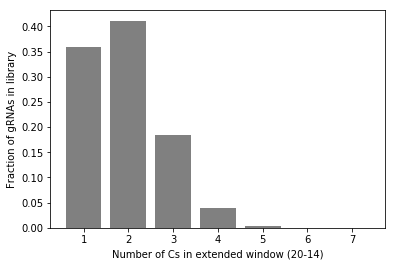

In [23]:
# count all guides with only one of 19,18,17,16 as a C in library

total = 0

C_number_dict = {1:0,
                 2:0,
                 3:0,
                 4:0,
                 5:0,
                 6:0,
                 7:0}

for pattern in list(pattern_counter.keys()):
    
    n_C = pattern.count('C')
    
    C_number_dict[n_C] += pattern_counter[pattern]
        
        
print C_number_dict

plt.bar([x for x in C_number_dict.keys()], [(float(C_number_dict[x])/sum(C_number_dict.values())) for x in C_number_dict.keys()], color = 'grey')
plt.xlabel("Number of Cs in extended window (20-14)")
plt.ylabel('Fraction of gRNAs in library')

## Plot the number of guides in each co-edit probability category

39978
0.859247586172 Very low to low risk
0.0832207714243 High risk


([<matplotlib.axis.XTick at 0x7f88635cc650>,
 <a list of 5 Text xticklabel objects>)

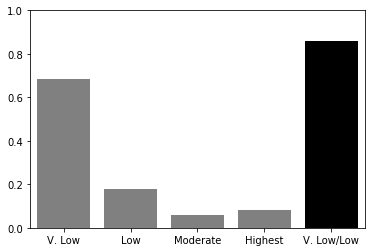

In [24]:
sub_categories = {1:0,
                  # guides with only one C in the 19,18,17,16 window: NCDDDNN/NDCDDNN/NDDCDNN
                  # Very low risk
                  2:0,
                  # guides with only one C in the 19,18,17 window: NCDDCNN/NDCDCNN/NDDCCNN
                  # Low risk
                  3:0,
                  # guides with Cs at position 19 and 17: NCDCNNN
                  # Moderate risk
                  4:0}
                  # guides with Cs at positions 19, 18: NCCDNNN
                  # High risk



for pattern in list(pattern_counter.keys()):

    if pattern[1:5].count('C')  == 1:
        sub_categories[1] += pattern_counter[pattern]
        #print pattern, '1'
        
    elif pattern[1:4].count('C') == 1 and pattern[4] == 'C':
        sub_categories[2] += pattern_counter[pattern]
        #print pattern, '2'
        
    elif pattern[1] == 'C' and pattern[3] == 'C':
        sub_categories[3] += pattern_counter[pattern]
        #print pattern, '3'
        
    elif pattern[1] == 'C' and pattern[2] == 'C':
        sub_categories[4] += pattern_counter[pattern]
        #print pattern, '3'
        


        
plt.bar([x for x in sub_categories.keys()], [(float(sub_categories[x])/sum(sub_categories.values())) for x in sub_categories.keys()],
        color = 'grey')

plt.bar([5], [float(sub_categories[1]+sub_categories[2])/sum(sub_categories.values())], color = 'k')
        

print sum(sub_categories.values())

plt.ylim(0,1)
plt.xlim(0.5, 5.5)

print float(sub_categories[1]+sub_categories[2])/sum(sub_categories.values()), 'Very low to low risk'
print float(sub_categories[4])/sum(sub_categories.values()), 'High risk'

plt.xticks([1,2,3,4,5], ['V. Low', 'Low', 'Moderate', 'Highest', 'V. Low/Low'])




## Plot the occupancy of Cs in the extended activity window

[14, 15, 16, 17, 18, 19, 20]


Text(0,0.5,'Fraction of gRNAs with editable nucleotide')

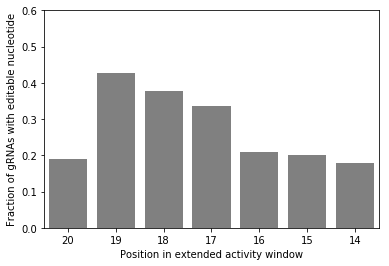

In [25]:

n_guides  = sum(pattern_counter.values())

occupancy_dict = {20:0,
                  19:0,
                  18:0,
                  17:0,
                  16:0,
                  15:0,
                  14:0}

print list(occupancy_dict.keys())

for pattern in pattern_counter.keys():
    
    for nt_pos in range(0,7):
        
        if pattern[nt_pos] == 'C':
            
            occupancy_dict[(20-nt_pos)] += pattern_counter[pattern]
        
        
for nt in occupancy_dict.keys():
    
    occupancy_dict[nt] = float(occupancy_dict[nt])/n_guides
    
reordered_keys = sorted(occupancy_dict.keys(), reverse=True)
        
        
plt.bar([x for x in reordered_keys], [occupancy_dict[x] for x in reordered_keys],
        color = 'grey')

plt.xlim(20.5,13.5)
plt.ylim(0,0.6)

plt.xlabel('Position in extended activity window')
plt.ylabel('Fraction of gRNAs with editable nucleotide')
    




In [26]:
def get_gRNA_coedit_chance(guide_seq):
    
    guide_seq = guide_seq[0:7]
    
    guide_seq = guide_seq.replace('A', 'D').replace('T', 'D').replace('G', 'D')
    
    
    if guide_seq[1:5].count('C')  == 1:
        co_edit_risk = 1
        #Very Low
        
    elif guide_seq[1:4].count('C') == 1 and guide_seq[4] == 'C':
        co_edit_risk = 2
        #Low
        
    elif guide_seq[1] == 'C' and guide_seq[3] == 'C':
        co_edit_risk = 3
        #Moderate
        
    elif guide_seq[1] == 'C' and guide_seq[2] == 'C':
        co_edit_risk = 4
        #High
    return co_edit_risk

chip_table['co_edit_risk'] = np.nan

In [27]:

for gRNA in tqdm(list(chip_table.index)):
    
    gRNA_seq = chip_table.loc[gRNA]['sequence']
    
    risk_cat = get_gRNA_coedit_chance(gRNA_seq)
    

    chip_table.at[gRNA, ('co_edit_risk')] = risk_cat
    

100%|██████████| 39978/39978 [00:06<00:00, 5845.60it/s]


(array([27281.,     0.,     0.,  7070.,     0.,     0.,  2300.,     0.,
            0.,  3327.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

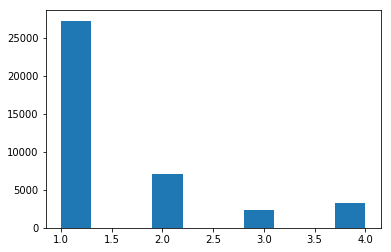

In [28]:
plt.hist(chip_table['co_edit_risk'])
# looks identical to the plot made outside the table, good

In [29]:
chip_table['mut2_C>G'].head(20)

guide_name
chrI_55522r                     NaN
chrI_55603r                 S|413|R
chrI_55655                      NaN
chrI_55964                  E|297|Q
chrI_55988                  E|289|Q
chrI_56003                  E|285|D
chrI_56041                      NaN
chrI_56071                      NaN
chrI_56113r                 S|243|*
chrI_56144                      NaN
chrI_56191r                     NaN
chrI_56300     silent|CTG>CTC|L|186
chrI_56299                  E|185|D
chrI_56329                  E|176|D
chrI_56446                      NaN
chrI_56562r     silent|GGC>GGG|G|93
chrI_56550                      NaN
chrI_56563r     silent|GGC>GGG|G|93
chrI_56572                      NaN
chrI_56580r                  R|86|G
Name: mut2_C>G, dtype: object

In [30]:
def get_aa_affected(mut):
    
    if mut == 'invalid seq' or mut == 'error':
        
        return 'NA'
    
    elif 'silent' in mut:
        mut = mut.split('|')
        pos = mut[3]
        return pos
    
    else:
        mut = mut.split('|')
        pos = mut[1]
        return pos
    
get_aa_affected('invalid seq')

'NA'

In [31]:
guides_no_mut_pred = 0

one_aa_affected = {1:0,
                   2:0,
                   3:0,
                   4:0}

two_aa_affected = {1:0,
                   2:0,
                   3:0,
                   4:0}


for gRNA in list(chip_table.index):
    
    mut1 = None
    mut2 = None
    pos1 = None
    pos2 = None

    mut1 = chip_table.loc[gRNA]['mut1_C>G']
    
    pos1 = get_aa_affected(mut1)
    
    
    mut2 = chip_table.loc[gRNA]['mut2_C>G']
    
    risk_cat = int(chip_table.loc[gRNA]['co_edit_risk'])
    

    
    if mut2 in [np.NaN]:
        
        pos2 = 'NA'
        
    
    else:
        
        pos2 = get_aa_affected(mut2)
    #print mut1, pos_1, risk_cat

        
    if pos1 == 'NA' and pos2 =='NA':
        
        guides_no_mut_pred += 1
        
    elif pos1 != 'NA' and pos2 == 'NA':
        
        one_aa_affected[risk_cat] += 1
        
    elif pos1 == pos2:
        
        one_aa_affected[risk_cat] += 1
        
    elif pos1 != pos2:
        
        two_aa_affected[risk_cat] += 1
        
    
        
        
    #print aa_affected_1, aa_affected_2
    
print guides_no_mut_pred
print one_aa_affected

1797
{1: 15802, 2: 1931, 3: 628, 4: 2258}


39978

[0.4138707734213352, 0.05057489327152249, 0.01644797150415128, 0.05913936251014903]


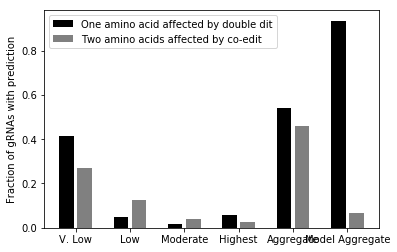

In [32]:
print sum(one_aa_affected.values()) + sum(two_aa_affected.values()) + guides_no_mut_pred
# make sure the total number of guides is consistent

predic_sum = sum(one_aa_affected.values()) + sum(two_aa_affected.values())

print 
print [float(one_aa_affected[x])/predic_sum for x in range(1,5)]
   
plt.bar([1,4,7,10], [float(one_aa_affected[x])/predic_sum for x in range(1,5)], color = 'k')
plt.bar([2,5,8,11], [float(two_aa_affected[x])/predic_sum for x in range(1,5)], color = 'grey')

plt.bar([13], [float(sum(one_aa_affected.values()))/predic_sum], color = 'k')
plt.bar([14], [float(sum(two_aa_affected.values()))/predic_sum], color = 'grey')


single_aa_model_aggregate = float(sum(one_aa_affected.values()) + two_aa_affected[1] + two_aa_affected[2])/predic_sum
two_aa_model_aggregate = float(two_aa_affected[3] + two_aa_affected[4])/predic_sum

#print single_aa_model_aggregate + two_aa_model_aggregate + guides_no_mut_pred
# make sure the total number of guides is consistent

plt.bar([16], single_aa_model_aggregate, color = 'k')
plt.bar([17], two_aa_model_aggregate, color = 'grey')

plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ['V. Low', 'Low', 'Moderate', 'Highest', 'Aggregate', 'Model Aggregate'])

plt.ylabel('Fraction of gRNAs with prediction')

plt.legend(['One amino acid affected by double dit', 'Two amino acids affected by co-edit'])

## Make figure for supp mat on library composition/ co-editing

{1: 14336, 2: 16450, 3: 7398, 4: 1606, 5: 181, 6: 7, 7: 0}
39978
0.859247586172 Very low to low risk
0.0832207714243 High risk


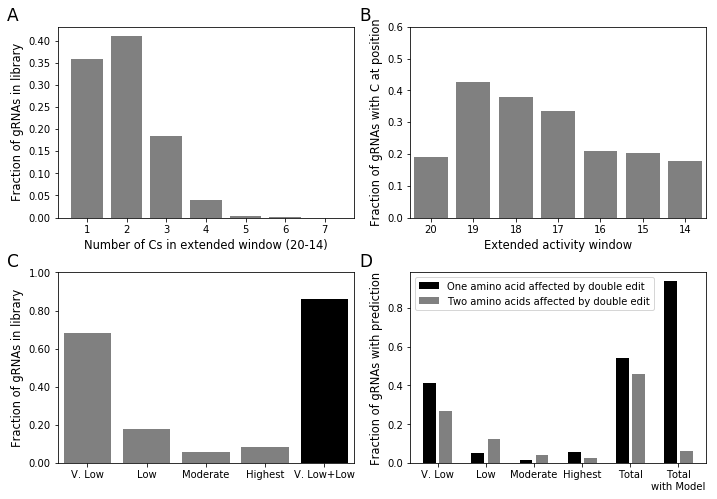

In [33]:
plt.figure(figsize =(10,7))

#############################
ax1 = plt.subplot(221)


print C_number_dict

plt.bar([x for x in C_number_dict.keys()], [(float(C_number_dict[x])/sum(C_number_dict.values())) for x in C_number_dict.keys()], color = 'grey')
plt.xlabel("Number of Cs in extended window (20-14)", fontsize = 11.5)
plt.ylabel('Fraction of gRNAs in library', fontsize = 11.5)


plt.text(-.17, 1.03, 'A', fontsize = 17, transform = ax1.transAxes)


#############################
ax2 = plt.subplot(222)

plt.bar([x for x in reordered_keys], [occupancy_dict[x] for x in reordered_keys],
        color = 'grey')

plt.xlim(20.5,13.5)
plt.ylim(0,0.6)

plt.xlabel('Extended activity window', fontsize = 11.5)
plt.ylabel('Fraction of gRNAs with C at position', fontsize = 11.5)
    
plt.text(-.17, 1.03, 'B', fontsize = 17, transform = ax2.transAxes)



#############################
ax3 = plt.subplot(223)

plt.bar([x for x in sub_categories.keys()], [(float(sub_categories[x])/sum(sub_categories.values())) for x in sub_categories.keys()],
        color = 'grey')

plt.bar([5], [float(sub_categories[1]+sub_categories[2])/sum(sub_categories.values())], color = 'k')
        

print sum(sub_categories.values())

plt.ylim(0,1)
plt.xlim(0.5, 5.5)

print float(sub_categories[1]+sub_categories[2])/sum(sub_categories.values()), 'Very low to low risk'
print float(sub_categories[4])/sum(sub_categories.values()), 'High risk'

plt.xticks([1,2,3,4,5], ['V. Low', 'Low', 'Moderate', 'Highest', 'V. Low+Low'])
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0.00','0.20','0.40','0.60','0.80','1.00'])

plt.ylabel('Fraction of gRNAs in library', fontsize = 11.5)

plt.text(-.17, 1.03, 'C', fontsize = 17, transform = ax3.transAxes)



#############################
ax4 = plt.subplot(224)

plt.bar([1,4,7,10], [float(one_aa_affected[x])/predic_sum for x in range(1,5)], color = 'k')
plt.bar([2,5,8,11], [float(two_aa_affected[x])/predic_sum for x in range(1,5)], color = 'grey')

plt.bar([13], [float(sum(one_aa_affected.values()))/predic_sum], color = 'k')
plt.bar([14], [float(sum(two_aa_affected.values()))/predic_sum], color = 'grey')


single_aa_model_aggregate = float(sum(one_aa_affected.values()) + two_aa_affected[1] + two_aa_affected[2])/predic_sum
two_aa_model_aggregate = float(two_aa_affected[3] + two_aa_affected[4])/predic_sum

#print single_aa_model_aggregate + two_aa_model_aggregate + guides_no_mut_pred
# make sure the total number of guides is consistent

plt.bar([16], single_aa_model_aggregate, color = 'k')
plt.bar([17], two_aa_model_aggregate, color = 'grey')

plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5], ['V. Low', 'Low', 'Moderate', 'Highest', 'Total', 'Total\nwith Model'])

plt.ylabel('Fraction of gRNAs with prediction', fontsize = 11.5)

plt.legend(['One amino acid affected by double edit', 'Two amino acids affected by double edit'], loc = 'upper left')

plt.text(-.17, 1.03, 'D', fontsize = 17, transform = ax4.transAxes)


plt.tight_layout()


plt.savefig('./manuscript/figures/figure_S_library_C_pos_coedit.svg', format = 'svg', dpi= 600)

## Hit rate vs risk category and stop codon position in activity window

In [37]:
exp_data = './z_score_annot.tsv'
experiment_df = pd.read_csv(exp_data, sep='\t', index_col=0, low_memory=False)
# import gRNA data and z-score table

#experiment_df.head(10)

In [38]:
guides_w_score = chip_table.loc[list(experiment_df.index)].copy(deep=True)

len(guides_w_score)

guides_w_score['z_score_meanSE'] = experiment_df['z_score_meanSE']
guides_w_score['over_threshold'] = experiment_df['over_threshold']

In [39]:
# influence of risk category for all guides

In [40]:
sum_all = 0
sum_hits = 0
sum_non_hit = 0

for risk in [1,2,3,4]:
    
    select_risk_cat = guides_w_score['co_edit_risk'] == risk
    
    over_threshold = guides_w_score['z_score_meanSE'] <= -2.01
    
    total_guides = len(guides_w_score[select_risk_cat])
    sum_all+=total_guides
    
    hits = len(guides_w_score[(select_risk_cat)&(over_threshold)])
    sum_hits+=hits
    
    non_hits = len(guides_w_score[(select_risk_cat)&(~over_threshold)])
    sum_non_hit+=non_hits
    
    print total_guides, hits, non_hits, float(hits)/float(non_hits)
    
print sum_all, sum_hits, sum_non_hit, float(sum_hits)/sum_non_hit
    

11252 412 10840 0.0380073800738
3193 140 3053 0.0458565345562
950 53 897 0.0590858416945
1359 103 1256 0.0820063694268
16754 708 16046 0.0441231459554


In [20]:
# influence of risk category for guides where mut1 is not a stop codon in an essential

In [41]:
stop_codon_CG1 = (guides_w_score['mut1_C>G'].str.contains('\*')) & (guides_w_score['orf_type'] == 'essential')
print len(guides_w_score[stop_codon_CG1]), ' guides with CG mut1 resulting in stop codon'

stop_codon_CT1 = (guides_w_score['mut1_C>T'].str.contains('\*')) & (guides_w_score['orf_type'] == 'essential')
print len(guides_w_score[stop_codon_CT1]), ' guides with CT mut1 resulting in stop codon'

non_stop_codon = ~(stop_codon_CG1 | stop_codon_CT1)
print len(guides_w_score[non_stop_codon]) , ' guides with both CG mut1 and CT mut1 not resulting in stop codon'

sum_all = 0
sum_hits = 0
sum_non_hit = 0

for risk in [1,2,3,4]:
    
    select_risk_cat = guides_w_score['co_edit_risk'] == risk
    
    over_threshold = guides_w_score['z_score_meanSE'] <= -2.01
    
    total_guides = len(guides_w_score[(select_risk_cat)&(non_stop_codon)])
    sum_all+=total_guides
    
    hits = len(guides_w_score[(select_risk_cat)&(over_threshold)&(non_stop_codon)])
    sum_hits+=hits
    
    non_hits = len(guides_w_score[(select_risk_cat)&(~over_threshold)&(non_stop_codon)])
    sum_non_hit+=non_hits
    
    print total_guides, hits, non_hits, float(hits)/float(non_hits)
    
print sum_all, sum_hits, sum_non_hit, float(sum_hits)/sum_non_hit




480  guides with CG mut1 resulting in stop codon
752  guides with CT mut1 resulting in stop codon
15522  guides with both CG mut1 and CT mut1 not resulting in stop codon
10359 339 10020 0.0338323353293
2986 120 2866 0.0418702023726
892 48 844 0.0568720379147
1285 87 1198 0.0726210350584
15522 594 14928 0.0397909967846


In [42]:
sum_all = 0
sum_hits = 0
sum_non_hit = 0

for risk in [1,2,3,4]:
    
    select_risk_cat = guides_w_score['co_edit_risk'] == risk
    
    over_threshold = guides_w_score['z_score_meanSE'] <= -2.01
    
    total_guides = len(guides_w_score[(select_risk_cat)&(~non_stop_codon)])
    sum_all+=total_guides
    
    hits = len(guides_w_score[(select_risk_cat)&(over_threshold)&(~non_stop_codon)])
    sum_hits+=hits
    
    non_hits = len(guides_w_score[(select_risk_cat)&(~over_threshold)&(~non_stop_codon)])
    sum_non_hit+=non_hits
    
    print total_guides, hits, non_hits, float(hits)/float(non_hits)
    
print sum_all, sum_hits, sum_non_hit, float(sum_hits)/sum_non_hit


893 73 820 0.0890243902439
207 20 187 0.106951871658
58 5 53 0.0943396226415
74 16 58 0.275862068966
1232 114 1118 0.101967799642


In [43]:
is_TGG_to_stop = ~(non_stop_codon)&(guides_w_score['mut1_C>T'].str.contains('W'))
is_other_to_stop = ~(non_stop_codon)&~(guides_w_score['mut1_C>T'].str.contains('W'))


sum_all = 0
sum_hits = 0
sum_non_hit = 0

for risk in [1,2,3,4]:
    
    select_risk_cat = guides_w_score['co_edit_risk'] == risk
    
    over_threshold = guides_w_score['z_score_meanSE'] <= -2.01
    
    total_guides = len(guides_w_score[(select_risk_cat)&(is_TGG_to_stop)])
    sum_all+=total_guides
    
    hits = len(guides_w_score[(select_risk_cat)&(over_threshold)&(is_TGG_to_stop)])
    sum_hits+=hits
    
    non_hits = len(guides_w_score[(select_risk_cat)&(~over_threshold)&(is_TGG_to_stop)])
    sum_non_hit+=non_hits
    
    print total_guides, hits, non_hits, float(hits)/float(non_hits)
    
print sum_all, sum_hits, sum_non_hit, float(sum_hits)/sum_non_hit


47 8 39 0.205128205128
68 11 57 0.19298245614
4 2 2 1.0
46 13 33 0.393939393939
165 34 131 0.259541984733


In [44]:
sum_all = 0
sum_hits = 0
sum_non_hit = 0


for risk in [1,2,3,4]:
    
    select_risk_cat = guides_w_score['co_edit_risk'] == risk
    
    over_threshold = guides_w_score['z_score_meanSE'] <= -2.01
    
    total_guides = len(guides_w_score[(select_risk_cat)&(is_other_to_stop)])
    sum_all+=total_guides
    
    hits = len(guides_w_score[(select_risk_cat)&(over_threshold)&(is_other_to_stop)])
    sum_hits+=hits
    
    non_hits = len(guides_w_score[(select_risk_cat)&(~over_threshold)&(is_other_to_stop)])
    sum_non_hit+=non_hits
    
    print total_guides, hits, non_hits, float(hits)/float(non_hits)
    
print sum_all, sum_hits, sum_non_hit, float(sum_hits)/sum_non_hit

846 65 781 0.0832266325224
139 9 130 0.0692307692308
54 3 51 0.0588235294118
28 3 25 0.12
1067 80 987 0.081053698075


846 65 781 0.0832266325224
139 9 130 0.0692307692308
54 3 51 0.0588235294118
28 3 25 0.12


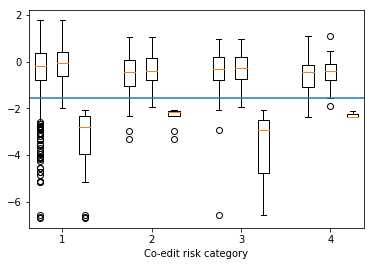

In [45]:
data_list = []

for risk in [1,2,3,4]:
    
    select_risk_cat = guides_w_score['co_edit_risk'] == risk
    
    over_threshold = guides_w_score['z_score_meanSE'] <= -2.01
    
    total_guides = len(guides_w_score[(select_risk_cat)&(is_other_to_stop)])
    data_list.append(guides_w_score[(select_risk_cat)&(is_other_to_stop)]['z_score_meanSE'])
    sum_all+=total_guides
    
        
    non_hits = len(guides_w_score[(select_risk_cat)&(~over_threshold)&(is_other_to_stop)])
    data_list.append(guides_w_score[(select_risk_cat)&(~over_threshold)&(is_other_to_stop)]['z_score_meanSE'])
    sum_non_hit+=non_hits
    
    hits = len(guides_w_score[(select_risk_cat)&(over_threshold)&(is_other_to_stop)])
    data_list.append(guides_w_score[(select_risk_cat)&(over_threshold)&(is_other_to_stop)]['z_score_meanSE'])
    sum_hits+=hits
    
    print total_guides, hits, non_hits, float(hits)/float(non_hits)
    
    
pos = [1,2,3,5,6,7,9,10,11,13,14,15]

plt.boxplot(data_list, positions=pos)
plt.xlabel('Co-edit risk category')
plt.xticks([2,6,10,14],[1,2,3,4])
plt.axhline(-1.57)

-6.70262316617
-2.801294148916956
-2.1572633330034487
-2.9452738841236936
-2.377283077439323


Text(0.5,0,'z-score')

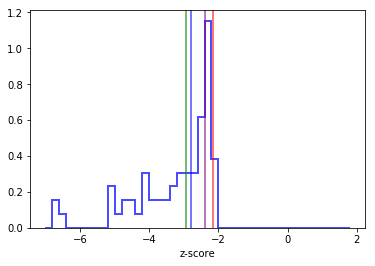

In [46]:
bins = [x for x in np.arange(-7, 2,0.2)]

print(min(data_list[2]))

plt.hist(data_list[2], histtype='step', bins=bins, density=True, linewidth=2, color = 'blue', alpha = 0.7)
plt.axvline(np.median(data_list[2]), color = 'blue', alpha = 0.7)
print np.median(data_list[2])

#plt.hist(data_list[5], histtype='step', bins=bins, density=True, linewidth=2, color = 'red', alpha = 0.7)
plt.axvline(np.median(data_list[5]), color = 'red', alpha = 0.7)
print np.median(data_list[5])


#plt.hist(data_list[8], histtype='step', bins=bins, density=True, linewidth=2, color = 'green', alpha = 0.7)
plt.axvline(np.median(data_list[8]), color = 'green', alpha = 0.7)
print np.median(data_list[8])


#plt.hist(data_list[11], histtype='step', bins=bins, density=True, linewidth=2, color = 'purple', alpha = 0.7)
plt.axvline(np.median(data_list[11]), color = 'purple', alpha = 0.7)
print np.median(data_list[11])



plt.xlabel('z-score')

In [47]:
stop_codon_CG1 = (guides_w_score['mut1_C>G'].str.contains('\*')) & (guides_w_score['orf_type'] == 'essential')
print len(guides_w_score[stop_codon_CG1]), ' guides with CG mut1 resulting in stop codon'

stop_codon_CT1 = (guides_w_score['mut1_C>T'].str.contains('\*')) & (guides_w_score['orf_type'] == 'essential')
print len(guides_w_score[stop_codon_CT1]), ' guides with CT mut1 resulting in stop codon'

stop_codon_CG2 = (guides_w_score['mut2_C>G'].str.contains('\*')) & (guides_w_score['orf_type'] == 'essential')
print len(guides_w_score[stop_codon_CG1]), ' guides with CG mut2 resulting in stop codon'

stop_codon_CT2 = (guides_w_score['mut2_C>T'].str.contains('\*')) & (guides_w_score['orf_type'] == 'essential')
print len(guides_w_score[stop_codon_CT1]), ' guides with CT mut2 resulting in stop codon'


pos1_stop = stop_codon_CG1|stop_codon_CT1
pos2_stop = stop_codon_CG2|stop_codon_CT2

pos1_dependent = pos1_stop & ~pos2_stop

480  guides with CG mut1 resulting in stop codon
752  guides with CT mut1 resulting in stop codon
480  guides with CG mut2 resulting in stop codon
752  guides with CT mut2 resulting in stop codon


In [48]:
dict_of_counter = {}

for risk_cat in [(1,2),(3,4)]:

    risk_counter = Counter()
    
    for start_codon in ['CAG', 'CAA', 'CGA', 'TCA', 'TGG', 'TAC']:
        
        counter_name = start_codon
        
        for status in ['_hit', '_total']:
        
            entry_name = counter_name + status
        
            risk_counter[entry_name] = 0

    select_risk_cat = guides_w_score['co_edit_risk'].isin(risk_cat)

    select_guide = (select_risk_cat) & (pos1_stop)

    for risk_cat_guide in list(guides_w_score[select_guide].index):

        start_aa_G = guides_w_score.loc[risk_cat_guide]['mut1_C>G']
        start_aa_T = guides_w_score.loc[risk_cat_guide]['mut1_C>T']
        
        sequence = guides_w_score.loc[risk_cat_guide]['sequence']

        if '*' in start_aa_G:
            mut_aa = start_aa_G[0]
            
            if mut_aa == 'S':
                mut_codon = 'TCA'
            elif mut_aa == 'Y':
                mut_codon = 'TAC'

        if '*' in start_aa_T:
            mut_aa = start_aa_T[0]
            
            if mut_aa == 'R':
                mut_codon = 'CGA'
            elif mut_aa == 'W':
                mut_codon = 'TGG'
            elif mut_aa == 'Q':
                target_site = sequence[1:6]
                if 'CAA' in target_site:
                    mut_codon = 'CAA'
                elif 'CAG' in target_site:
                    mut_codon = 'CAG'
            
        if guides_w_score.loc[risk_cat_guide]['z_score_meanSE'] <= -2.01:
            
            risk_counter[(mut_codon+'_hit')] += 1
            risk_counter[(mut_codon+'_total')] += 1
            
        else:
            risk_counter[(mut_codon+'_total')] += 1
        
    
    dict_of_counter[risk_cat] = risk_counter
        
    #print risk_counter, sum(risk_counter.values())
    
stop_start_by_risk = pd.DataFrame.from_dict(dict_of_counter, orient='index', 
                                            columns = ['CAA_hit', 'CAA_total', 'CAG_hit', 'CAG_total', 'CGA_hit', 
                                                       'CGA_total', 'TCA_hit', 'TCA_total', 'TGG_hit', 'TGG_total',
                                                       'TAC_hit', 'TAC_total'])
print stop_start_by_risk.head(10)

stop_start_by_risk['all_hit'] = stop_start_by_risk['CAA_hit'] + stop_start_by_risk['CAG_hit'] +\
                                stop_start_by_risk['CGA_hit']+ stop_start_by_risk['TCA_hit'] + \
                                stop_start_by_risk['TGG_hit']+ stop_start_by_risk['TAC_hit']

stop_start_by_risk['all_total'] = stop_start_by_risk['CAA_total'] + stop_start_by_risk['CAG_total'] +\
                                stop_start_by_risk['CGA_total']+ stop_start_by_risk['TCA_total'] + \
                                stop_start_by_risk['TGG_total']+ stop_start_by_risk['TAC_total']

stop_start_by_risk.loc['Total']= stop_start_by_risk.sum()

for codon in ['CAG', 'CAA', 'CGA', 'TCA', 'TGG', 'TAC', 'all']:
    
    hit_col = codon+ '_hit'
    total_col = codon + '_total'
    
    stop_start_by_risk[total_col].replace(0, np.nan, inplace=True)
    
    stop_start_by_risk[(codon+'_ratio_col')] = stop_start_by_risk[hit_col]/stop_start_by_risk[total_col]

stop_start_by_risk.head(10)

     CAA_hit  CAA_total  CAG_hit  CAG_total  CGA_hit  CGA_total  TCA_hit  \
1 2       10        361        9        121        0         28       32   
3 4        4         58        1         16        0          3        1   

     TCA_total  TGG_hit  TGG_total  TAC_hit  TAC_total  
1 2        269       19        115       23        206  
3 4          5       15         50        0          0  


,CAA_hit,CAA_total,CAG_hit,CAG_total,CGA_hit,CGA_total,TCA_hit,TCA_total,TGG_hit,TGG_total,...,TAC_total,all_hit,all_total,CAG_ratio_col,CAA_ratio_col,CGA_ratio_col,TCA_ratio_col,TGG_ratio_col,TAC_ratio_col,all_ratio_col
"(1, 2)",10,361,9,121,0,28,32,269,19,115,...,206.0,93,1100,0.074380,0.027701,0.0,0.118959,0.165217,0.11165,0.084545
"(3, 4)",4,58,1,16,0,3,1,5,15,50,...,NaN,21,132,0.062500,0.068966,0.0,0.200000,0.300000,NaN,0.159091
Total,14,419,10,137,0,31,33,274,34,165,...,206.0,114,1232,0.072993,0.033413,0.0,0.120438,0.206061,0.11165,0.092532


In [49]:
cols = [x+'_ratio_col' for x in ['CAA', 'CGA', 'CAG', 'TAC', 'TCA', 'TGG', 'all']]
cols

['CAA_ratio_col',
 'CGA_ratio_col',
 'CAG_ratio_col',
 'TAC_ratio_col',
 'TCA_ratio_col',
 'TGG_ratio_col',
 'all_ratio_col']

In [50]:
stop_start_by_risk[cols]

,CAA_ratio_col,CGA_ratio_col,CAG_ratio_col,TAC_ratio_col,TCA_ratio_col,TGG_ratio_col,all_ratio_col
"(1, 2)",0.027701,0.0,0.074380,0.11165,0.118959,0.165217,0.084545
"(3, 4)",0.068966,0.0,0.062500,NaN,0.200000,0.300000,0.159091
Total,0.033413,0.0,0.072993,0.11165,0.120438,0.206061,0.092532


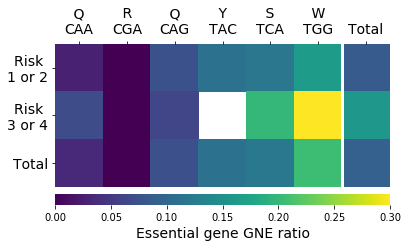

In [52]:


ax = sns.heatmap(stop_start_by_risk[cols], cmap='viridis', vmin=0, square=True,
                 cbar_kws = dict(use_gridspec=False,location="bottom",pad=0.03, label = 'GNE rate',
                                aspect =30))
plt.yticks([0.5,1.5,2.5], ['Risk \n1 or 2', 'Risk \n3 or 4', 'Total'], rotation = 0, fontsize=14)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], [' Q \nCAA', ' R \nCGA', ' Q \nCAG', ' Y \nTAC', 
                                           ' S \nTCA', ' W \nTGG', 'Total'],
           fontsize=14)
ax.xaxis.tick_top()
plt.axvline(6, color='white', linewidth = 3)

ax.figure.axes[-1].set_xlabel('Essential gene GNE ratio', size=14)
plt.savefig('./figures_revised/heatmap_stop_codons_revisedv2.svg', format='svg', dpi=600)
stop_start_by_risk[cols].to_csv('./figures_revised/stop_codon_efficiency_source_data_revisedv2.csv', 
                                na_rep = 'nan')

In [66]:
guides_w_score.to_csv('./screen_guides_wscoreannot_revisedv2.tsv', sep='\t')